In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.environ['raco'])
sys.path.append(os.environ['rapl'])

from common import *
from plotcommon import *

<IPython.core.display.Javascript object>


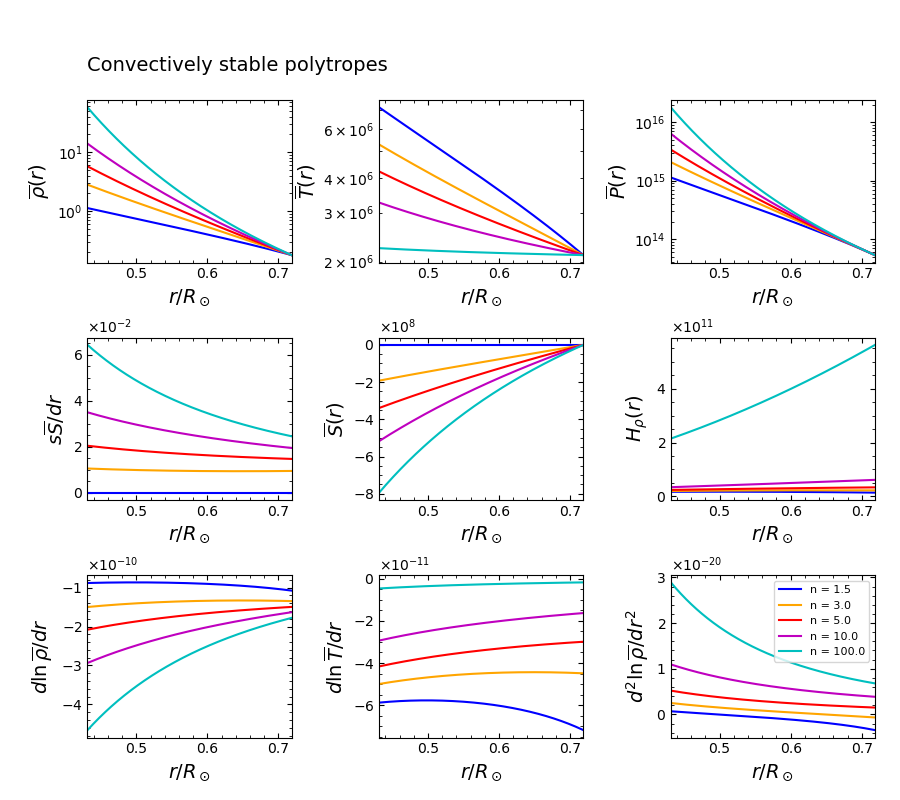

In [14]:
# pick fontsize
fontsize = 14

# define bottom radius, "integration radius", and number of grid points
rmin = 3.0e10
r0 = sun.r_bcz
nr = 1000

# Plot a bunch of reference states corresponding to different values 
# of the polytropic index n
nvals = np.array([1.5, 3., 5., 10., 100.])

count = 0
firstplot = True
for nval in nvals:
    # Define the constants a and b
    b = g_univ*msun/(sun.gas_constant*sun.tmp_bcz*r0)
    a = b/(nval + 1.)
    
    # define radius range
    if a > 1:
        rmax = (b/(b - (nval + 1.)))*r0
    else:
        rmax = np.infty
    if rmax > sun.r_bcz:
        rmax = sun.r_bcz
    #lilbit = 0.01
    #rmax = (1 - lilbit)*rmax
    
    rr = np.linspace(rmin, rmax, nr)
    
    # compute the polytrope
    zeta = a*r0/rr + (1. - a)

    tmp = sun.tmp_bcz*zeta
    rho = sun.rho_bcz*zeta**nval
    prs = sun.gas_constant*rho*tmp
    
    ntilde = 1.5
    prefactor = sun.c_p * (nval - ntilde)/(ntilde + 1.)
    dsdr = prefactor / rr / ( 1 + ((1 - a)/a)*(rr/r0) )
    sbar = prefactor * (np.log(rr/r0) - np.log(a + (1-a)*(rr/r0)) )
    
    hrho = rr * ( 1 + ((1 - a)/a)*(rr/r0) )

    dzeta = -a*r0/rr**2.
    d2zeta = 2.*a*r0/rr**3.
    dlnzeta = dzeta/zeta
    d2lnzeta = -dzeta**2./zeta**2. + d2zeta/zeta
    dlntmp = dlnzeta
    dlnrho = nval*dlnzeta
    d2lnrho = nval*d2lnzeta
    
    # now plot
    profiles = [rho, tmp, prs,
                dsdr, sbar, hrho,
                dlnrho, dlntmp, d2lnrho]

    if firstplot:
        nplots = len(profiles)
        nrow = 3
        ncol = nplots//nrow
        fig, axs, fpar = make_figure(nrow=nrow, ncol=ncol, width_inches=9., height_inches=8.)
        
        firstplot = False
    
    # plot the profiles
    for iplot in range(nplots):
        ax = axs.flatten()[iplot]
        ax.plot(rr/rsun, profiles[iplot], color = color_order[count], label='n = %.1f' %nval)
    
    count += 1

# add model S


    #profiles = [rho, tmp, prs,
                dsdr, sbar, hrho,
                dlnrho, dlntmp, d2lnrho]

# tidy and label the axes
ylabels = [r'$\overline{\rho}(r)$', r'$\overline{T}(r)$', r'$\overline{P}(r)$',\
           r'$s\overline{S}/dr$', r'$\overline{S}(r)$', r'$H_{\rho}(r)$',
          r'$d\ln\overline{\rho}/dr$', r'$d\ln\overline{T}/dr$', r'$d^2\ln\overline{\rho}/dr^2$']

count = 0
for ax in axs.flatten():
    # label the axes
    ax.set_xlabel(r'$r/R_\odot$', fontsize=fontsize)
    ax.set_ylabel(ylabels[count], fontsize=fontsize)
    
    # set x axis limits
    ax.set_xlim(rmin/rsun, sun.r_bcz/rsun)
    
    # make some logscale
    if count in [0, 1, 2]:
        ax.set_yscale('log')
    else:
        plt.sca(ax)
        plt.ticklabel_format(useMathText=True, axis='y', scilimits=(0,0))        
    
    # get ticks everywhere
    plt.sca(ax)
    plt.minorticks_on()
    plt.tick_params(top=True, right=True, direction='in', which='both')

    
    count += 1
    
fig.text(fpar['margin_left'] + fpar['sub_margin_left'], 1 - fpar['margin_top'], 'Convectively stable polytropes',\
         fontsize=fontsize, ha='left', va='bottom')
plt.legend(fontsize=8)


plt.savefig('figures/polytropes_stable.png')
#plt.close()

In [3]:
r0

50000000000.0